# Minimização de Funções com Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
    1.1. [Resultados do Primeiro Caso de Teste](#Resultados-do-Primeiro-Caso-de-Teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)<br>
    2.1. [Resultado do Segundo Caso de Teste](#Resultado-do-Segundo-Caso-de-Teste)<br>
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)<br>
    3.1. [Resultados do Terceiro Caso de Teste](#Resultados-do-Terceiro-Caso-de-Teste)

In [1]:
pathFileImages = 'C:/Users/julia/TOPICOS ESPECIAIS EM COMPUTAÇAO/'

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Funções usadas no código

In [2]:
def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

#funções de conversão de população para as faixas de cada caso de teste
def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def converter2(palavra):
    lb = np.amin(palavraAlvo)
    ub = np.amax(palavraAlvo)
    novaPalavra = np.array([])
    novaPalavra = lb+(ub - lb)*palavra
    
    return novaPalavra

def converter3(pop):
    lb = -5.12
    ub = 5.12
    novaPop = []
    for i in pop:
        novaPop.append(lb + (ub - lb) * i)
    return np.array(novaPop)

#função fitness 1
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

#função fitness 2
def diferenca(p1,p2):
    diferenca = np.array([])
    diferenca = np.c_[(abs(p1 - p2))]
    d = np.array([])
    for i in range(len(diferenca)):
        d = np.append(d,(np.mean(diferenca[i],axis=0)))
    return d

#função fitness 3
def rastrigin(x):
    fit=[]
    for i in range(len(x)):
        n=10 * dim_3 + (x[i]**2 - (10 * math.cos(2 * math.pi * x[i])))
        fit.append(n)
    return fit

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


### Definição das populações

In [3]:
#primeiro caso de teste
tamanho = 100
dim = 3

#segundo caso de teste
tamanho_2 = 100
dim_2 = 30

#terceiro caso de teste
tamanho_3 = 50
dim_3 = 2

## Primeiro caso de teste

In [4]:
#população inicial (primeira geração)
pop=criaPop(tamanho,dim)

In [5]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)


In [6]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)


In [7]:
#ordenação
pop_ord = pop[(pop[0:, -1]).argsort()]


In [8]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(tamanho/2),:]


In [9]:
#contagem de população estagnada
cont = 0
delta = 0.01
sem_evoluir = 1000
i_desejadas = 5
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=np.array([])
    
    nova_melhor_pop = melhor_pop_inicial.copy()

    #novos 50% da população
    nova_pop = criaPop(int(tamanho/2),dim)

    #converter para as faixas
    nova_pop = converter1(nova_pop)

    #fitness da nova população
    nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

    #melhor 50% pop anterior + 50% nova população
    nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

    #reordena
    melhor_pop = nova_melhor_pop[(nova_melhor_pop[0:, -1]).argsort()]

    #melhor fit dessa geração
    melhor_i= np.array(melhor_pop[0:1,:])
    
    for i in range(1000):
        
        #gerações posteriores
        
        nova_melhor_pop = melhor_pop[0:int(tamanho/2),:]

        nova_pop = criaPop(int(tamanho/2),dim)

        nova_pop = converter1(nova_pop)

        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

        melhor_i= np.append(melhor_i,melhor_pop[0:1,:],axis=0)

        evolucao = estagnacao(melhor_i[i-1,-1],melhor_i[i,-1])
        
        if evolucao <= delta:
            cont += 1
            
        elif evolucao > delta:
            cont=0

        elif sem_evoluir == cont:
            break

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)

print('Melhor indivíduo para o caso de teste 1:\n', melhor_i[-1,:-1])


Melhor indivíduo para o caso de teste 1:
 [0.97360734 2.06147091 3.04890854]


In [10]:
#media e desvio padrao dos fits
desvioP = np.std(tabela[3],axis=1)
media = np.mean(tabela[3],axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
melhor_i.shape

(1001, 4)

In [11]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#plt.plot(media, color = "red", label = "Média")
#plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='red', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()

## Resultados do Primeiro Caso de Teste

### População de tamanho 10

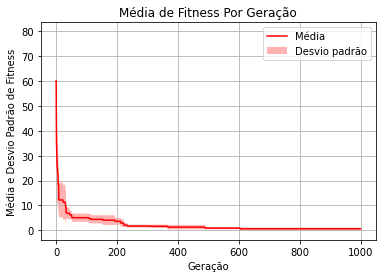

In [12]:
Image(filename = pathFileImages + '1 Caso de teste - pop10.png')

### População de tamanho 50

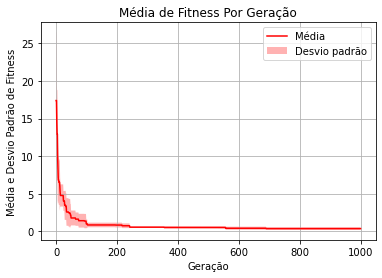

In [13]:
Image(filename = pathFileImages + '1 Caso de teste - pop50.png')

### População de tamanho 100

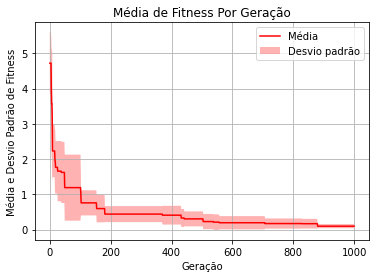

In [14]:
Image(filename = pathFileImages + '1 Caso de teste - pop100.png')

[Início](#Índice)

## Segundo caso de teste

In [15]:
palavraAlvo = np.array([[
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1]])

In [16]:
#palavra aleatoria
palavra=criaPop(tamanho_2,dim_2)
palavra = np.array(converter2(criaPop(tamanho_2,dim_2)))

In [17]:
d = diferenca(palavraAlvo,palavra) #diferenca entre cada elemento

In [18]:
#palavra + fitness
palavra = np.append(palavra,diferenca(palavraAlvo,palavra).reshape(-1,1),axis=1)

In [19]:
#ordenação e poda
palavra_ord = palavra[(palavra[0:, -1]).argsort()]
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]

In [20]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 1000
i_desejadas = 10
evolucao = 0
tabela2 = pd.DataFrame()

for j in range(i_desejadas):

    nova_melhor_pop = melhor_palavra_inicial.copy()

    nova_pop = criaPop(int(tamanho_2/2),dim_2)

    nova_pop = converter2(nova_pop)
    
    nova_pop = np.append(nova_pop,(diferenca(palavraAlvo,nova_pop)).reshape(-1,1),axis=1)

    nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
    
    melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

    melhor_i= np.array(melhor_pop[0:1,:])
    
    for i in range(sem_evoluir):
        
        nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

        nova_pop = criaPop(int(tamanho_2/2),dim_2)

        nova_pop = converter2(nova_pop)

        nova_pop = np.append(nova_pop,(diferenca(palavraAlvo,nova_pop)).reshape(-1,1),axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

        melhor_i= np.append(melhor_i,melhor_pop[0:1,:],axis=0)
        
        evolucao = estagnacao(melhor_i[i-1,-1],melhor_i[i,-1])
        
        if evolucao <= delta:
            cont += 1
            
        elif evolucao > delta:
            cont=0

        elif sem_evoluir == cont:
            break
            
    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1)
print("Melhor palavra encontrada:\n",melhor_i[-1,:-1])#,"\n\nDiferença media entre os individuos da melhor palavra e a palavra alvo:\n", nova_melhor_pop[0, -1])

Melhor palavra encontrada:
 [ 58.48594085  74.34511788  86.22149886  63.99472074 124.5011179
 124.4046663  105.24943678 118.4066196   61.55587374 115.98090483
  67.02897159 113.29940946  87.75227483  76.91008612  89.68788464
  60.78595608  82.8738219  117.53018038  83.17276457 113.80459397
  89.16860888 105.34978618  82.76627072  61.26417317  91.32076221
  93.99234525  76.30917125  95.79501375  71.60691409 111.16198509]


In [21]:
#media e desvio padrao dos fits
desvioP2 = np.std(tabela2[30],axis=1)
media2 = np.mean(tabela2[30],axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

In [22]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#lt.plot(media2, color = "green", label = "Média")
#lt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()
#print('\nNúmero de iterações para a última convergência: ',i+1)

## Resultados do Segundo Caso de Teste

### População de tamanho 10

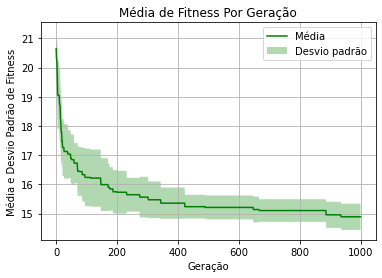

In [23]:
Image(filename = pathFileImages + '2 Caso de teste - pop10.png')

### População de tamanho 50

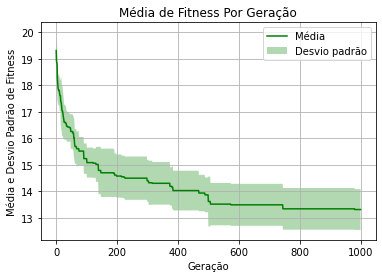

In [24]:
Image(filename = pathFileImages + '2 Caso de teste - pop50.png')

### População de tamanho 100

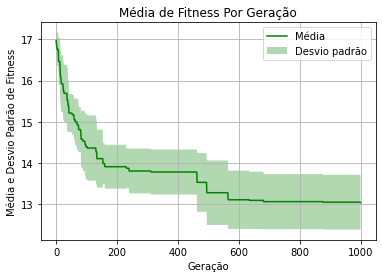

In [25]:
Image(filename = pathFileImages + '2 Caso de teste - pop100.png')

[Início](#Índice)<br>

## Terceiro caso de teste

In [26]:
pop_3 = criaPop(tamanho_3,dim_3)
pop_3 = pop_3.T

In [27]:
pop3 = converter3(pop_3)
for i in pop3:
    p=rastrigin(i)
p=np.array(p)

In [28]:
#pop add fitness
pop_3 = pop_3.T
pop_3 = np.append(pop_3,p.reshape(-1,1),axis=1)


In [29]:
#ordenação e poda
pop3 = pop_3[abs(pop_3[0:,-1]).argsort()] 
melhor_pop3_inicial= pop3[0:int(tamanho_3/2),:] 


In [30]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 1000
i_desejadas = 10

In [31]:
tabela3 = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        
        if i==0:
            nova_melhor_pop = melhor_pop3_inicial.copy()

            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            nova_pop = converter3(nova_pop)

            for i in nova_pop:
                fit=rastrigin(i)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            melhor_i.append(melhor_pop[0:1,-1])
            
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_3/2),:]

            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            nova_pop = converter3(nova_pop)

            for k in nova_pop:
                fit=rastrigin(k)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            melhor_i.append(melhor_pop[0:1,-1])
            
            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])
            
            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela3 = pd.concat([tabela3, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP3 = np.std(tabela3,axis=1)
media3 = np.mean(tabela3,axis=1)
desvioInf3 = media3 - desvioP3
desvioSup3 = media3 + desvioP3

print('Melhor indivíduo das gerações:\n', pd.DataFrame(melhor_pop[:1,:-1]))

Melhor indivíduo das gerações:
           0         1
0  3.748984  0.000181


In [32]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#plt.plot(media3, color = "blue", label = "Média")
#plt.fill_between(range(len(media3)), desvioSup3, desvioInf3, facecolor='blue', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()


## Resultados do Terceiro Caso de Teste

### População de tamanho 10

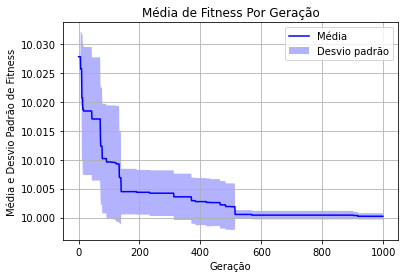

In [33]:
Image(filename = pathFileImages + '3 Caso de teste - pop10.png')

### População de tamanho 50

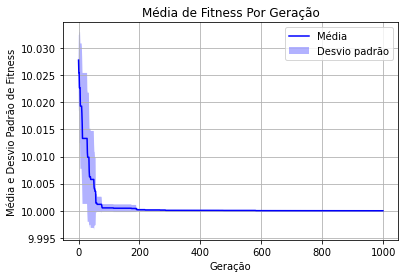

In [34]:
Image(filename = pathFileImages + '3 Caso de teste - pop50.png')

### População de tamanho 100

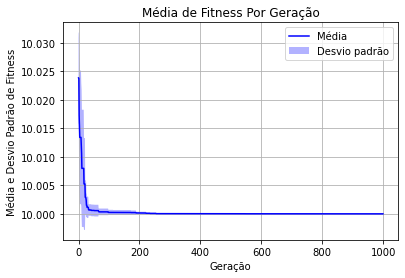

In [35]:
Image(filename = pathFileImages + '3 Caso de teste - pop100.png')

[Início](#Índice)<br>